In [95]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree 
import matplotlib.pyplot as plt
import graphviz
#import numpy as np

In [96]:
rawDf = pd.read_csv("data/tier6ind2.csv")
df = rawDf.copy()
df = df.dropna(subset = ["divsRank"])
df.head()

,divsRank,swimmerage,event,qualified,points,divsSpeed,numRelays,numEvents,seedSpeed,numSwimmers,...,divsTimePctOfMean,divsSpeedDiffFromMean,normed_divsTimePctOfMean,normed_divsSpeedDiffFromMean,normed_divsSpeed,normed_numSwimmers,normed_numQualified,normed_swimmerage,clipped_divsRank,normed_numRelays
0,1.0,15,1,True,20,1.446759,2,2,1.331115,15,...,0.728062,0.349520,-1.417602,1.671540,1.153046,-0.804906,-1.068498,-0.901005,0.041667,1.0
1,2.0,15,1,True,16,1.435441,1,2,1.392564,15,...,0.733803,0.338202,-1.387676,1.617412,1.108569,-0.804906,-1.068498,-0.901005,0.083333,0.5
2,3.0,17,1,True,18,1.430206,2,2,1.517451,15,...,0.736489,0.332967,-1.373674,1.592376,1.087997,-0.804906,-1.068498,1.325008,0.125000,1.0
3,4.0,17,1,True,14,1.322227,2,2,1.198753,15,...,0.796634,0.224988,-1.060140,1.075978,0.663670,-0.804906,-1.068498,1.325008,0.166667,1.0
4,5.0,17,1,True,12,1.208532,1,2,1.176886,15,...,0.871578,0.111293,-0.669457,0.532248,0.216885,-0.804906,-1.068498,1.325008,0.208333,0.5


In [97]:
y = df["points"]

In [98]:
x = df[["normed_divsSpeedDiffFromMean", "normed_divsSpeed", "clipped_divsRank", "qualified", "stroke"]]
x["clipped_divsRank"] = x["clipped_divsRank"] * 24

x.qualified = x.qualified.astype(int)
strokes = x.pop("stroke")
strokesOneHot = pd.get_dummies(strokes, prefix="stroke_")
x = pd.concat([x, strokesOneHot], axis=1)


print(x.dtypes)
print(x.isna().sum())
x.describe()

c:\Users\tang-\Documents\Python Scripts\skynet2\skynetvenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\tang-\Documents\Python Scripts\skynet2\skynetvenv\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
normed_divsSpeedDiffFromMean    float64
normed_divsSpeed                float64
clipped_divsRank                float64
qualified                         int32
stroke__Backstroke                

,normed_divsSpeedDiffFromMean,normed_divsSpeed,clipped_divsRank,qualified,stroke__Backstroke,stroke__Breaststroke,stroke__Butterfly,stroke__Freestyle,stroke__IM
count,3.439000e+03,3.439000e+03,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000
mean,-1.188026e-17,1.652905e-17,12.801396,0.577493,0.241349,0.206165,0.070369,0.414655,0.067461
std,1.000000e+00,1.000000e+00,8.024239,0.494030,0.427964,0.404609,0.255806,0.492734,0.250856
min,-3.698551e+00,-2.462060e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.740476e-01,-7.609783e-01,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-7.638944e-02,-1.069461e-01,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.863026e-01,6.809028e-01,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.018308e+00,3.358681e+00,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 45)

In [104]:
model = DecisionTreeRegressor(
    min_samples_leaf=64
)
model = model.fit(trainX, trainY)


2.407735015651445


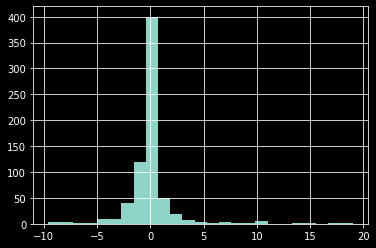

In [105]:

predictedY = model.predict(testX)
errors = predictedY - testY

print((sum(errors ** 2)/len(errors))**0.5)
errors.hist(bins = 25)

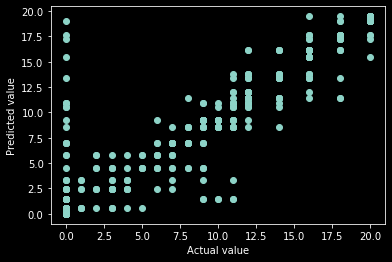

In [106]:
plt.scatter(testY, predictedY)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

In [107]:
treeData = tree.export_graphviz(
    model, 
    feature_names=x.columns,
    filled=True, rounded=True
)
graph = graphviz.Source(treeData)
graph.render("indTree1")

'indTree1.pdf'